<a href="https://colab.research.google.com/github/PiyushBagde/Tomato_leaf_diseases_detection_test_1/blob/main/tomato_leaf_disease_detection_resnet152v2_96_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/Datasets/cnn_train.py
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/f60044f6-40aa-4181-ac8c-3c79bb42a3fe___UF.GRC_YLCV_Lab 01817.JPG
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/d15d303a-ccf0-4be3-89d1-5cab14047b40___UF.GRC_YLCV_Lab 08576.JPG
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/f2cad6ef-b7b8-4ec0-9a97-fc8d8b76e4fc___YLCV_GCREC 2818.JPG
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/e7511553-2e16-4e51-8c5e-532879f7b882___UF.GRC_YLCV_Lab 02626.JPG
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/f8bff9a6-4e6f-43e3-9584-3783fd5571bb___UF.GRC_YLCV_Lab 02944.JPG
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/f655436a-01be-4f46-81f5-d5e9ac02b20c___YLCV_GCREC 2531.JPG
/content/drive/MyDrive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/daf4255b-9671-4fa4-8645-c4ab938e9d9f__

In [ ]:
os.chdir('/content/drive/MyDrive/Datasets')
os.listdir()

['train', 'val', 'cnn_train.py']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [ ]:
# Forming datasets
train = keras.preprocessing.image_dataset_from_directory('./train', label_mode='categorical')
val = keras.preprocessing.image_dataset_from_directory('./val', label_mode='categorical')

Found 3554 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


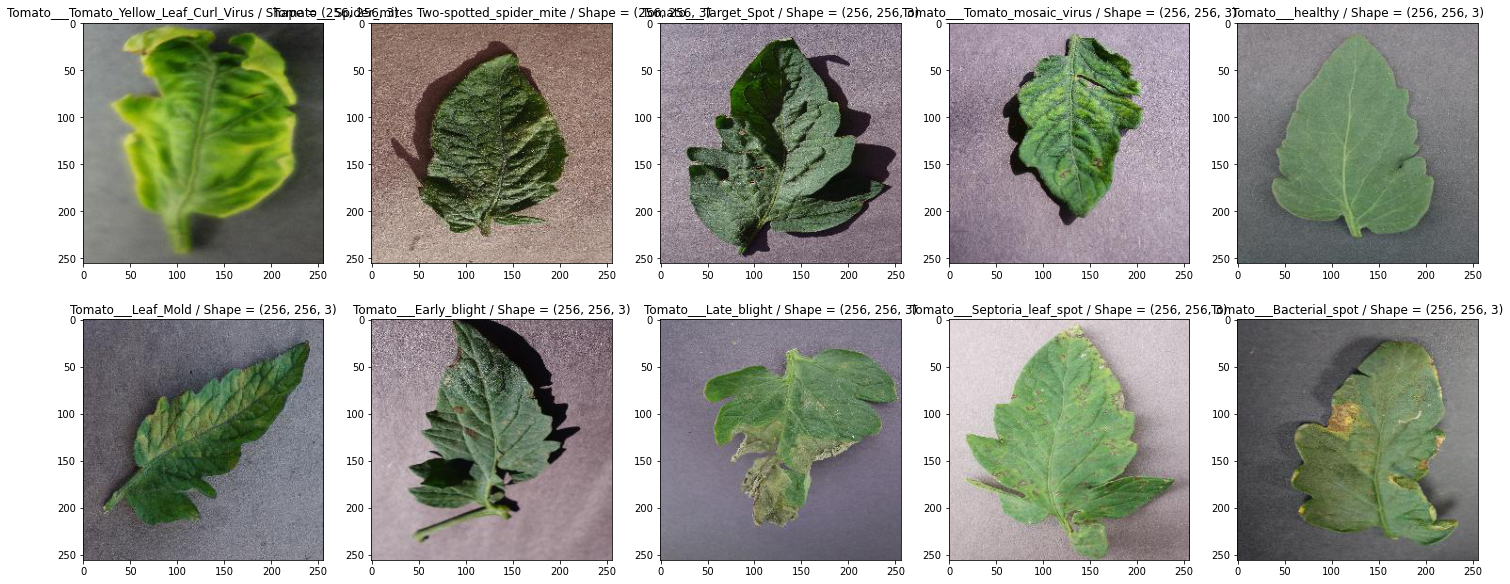

In [ ]:
# Training data visualization

classes = os.listdir('./train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image = Image.open('./train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [ ]:
# Function to initialize model (ResNet152V2)

def get_model():
    
    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
    
    for layers in base_model.layers[:140]:
        layers.trainable = False
    for layers in base_model.layers[140:]:
        layers.trainable = True
        
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [ ]:
# Model initialization
model = get_model()
model.summary()

234545216/234545216 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [ ]:
# Model training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
model.fit(train, batch_size=80, epochs=20, validation_data=val)

Epoch 1/20
112/112 [==============================] - 1138s 9s/step - loss: 1.2240 - accuracy: 0.6055 - val_loss: 2.8260 - val_accuracy: 0.2790
Epoch 2/20
112/112 [==============================] - 85s 760ms/step - loss: 0.5635 - accuracy: 0.8289 - val_loss: 1.2424 - val_accuracy: 0.6570
Epoch 3/20
112/112 [==============================] - 87s 769ms/step - loss: 0.3455 - accuracy: 0.8967 - val_loss: 1.3582 - val_accuracy: 0.6330
Epoch 4/20
112/112 [==============================] - 89s 789ms/step - loss: 0.2212 - accuracy: 0.9342 - val_loss: 1.1971 - val_accuracy: 0.6380
Epoch 5/20
112/112 [==============================] - 88s 780ms/step - loss: 0.1342 - accuracy: 0.9629 - val_loss: 1.3116 - val_accuracy: 0.6550
Epoch 6/20
112/112 [==============================] - 87s 776ms/step - loss: 0.1087 - accuracy: 0.9741 - val_loss: 0.7116 - val_accuracy: 0.7960
Epoch 7/20
112/112 [==============================] - 87s 777ms/step - loss: 0.0846 - accuracy: 0.9764 - val_loss: 1.1191 - val_acc

1/1 [==============================] - 0s 30ms/step


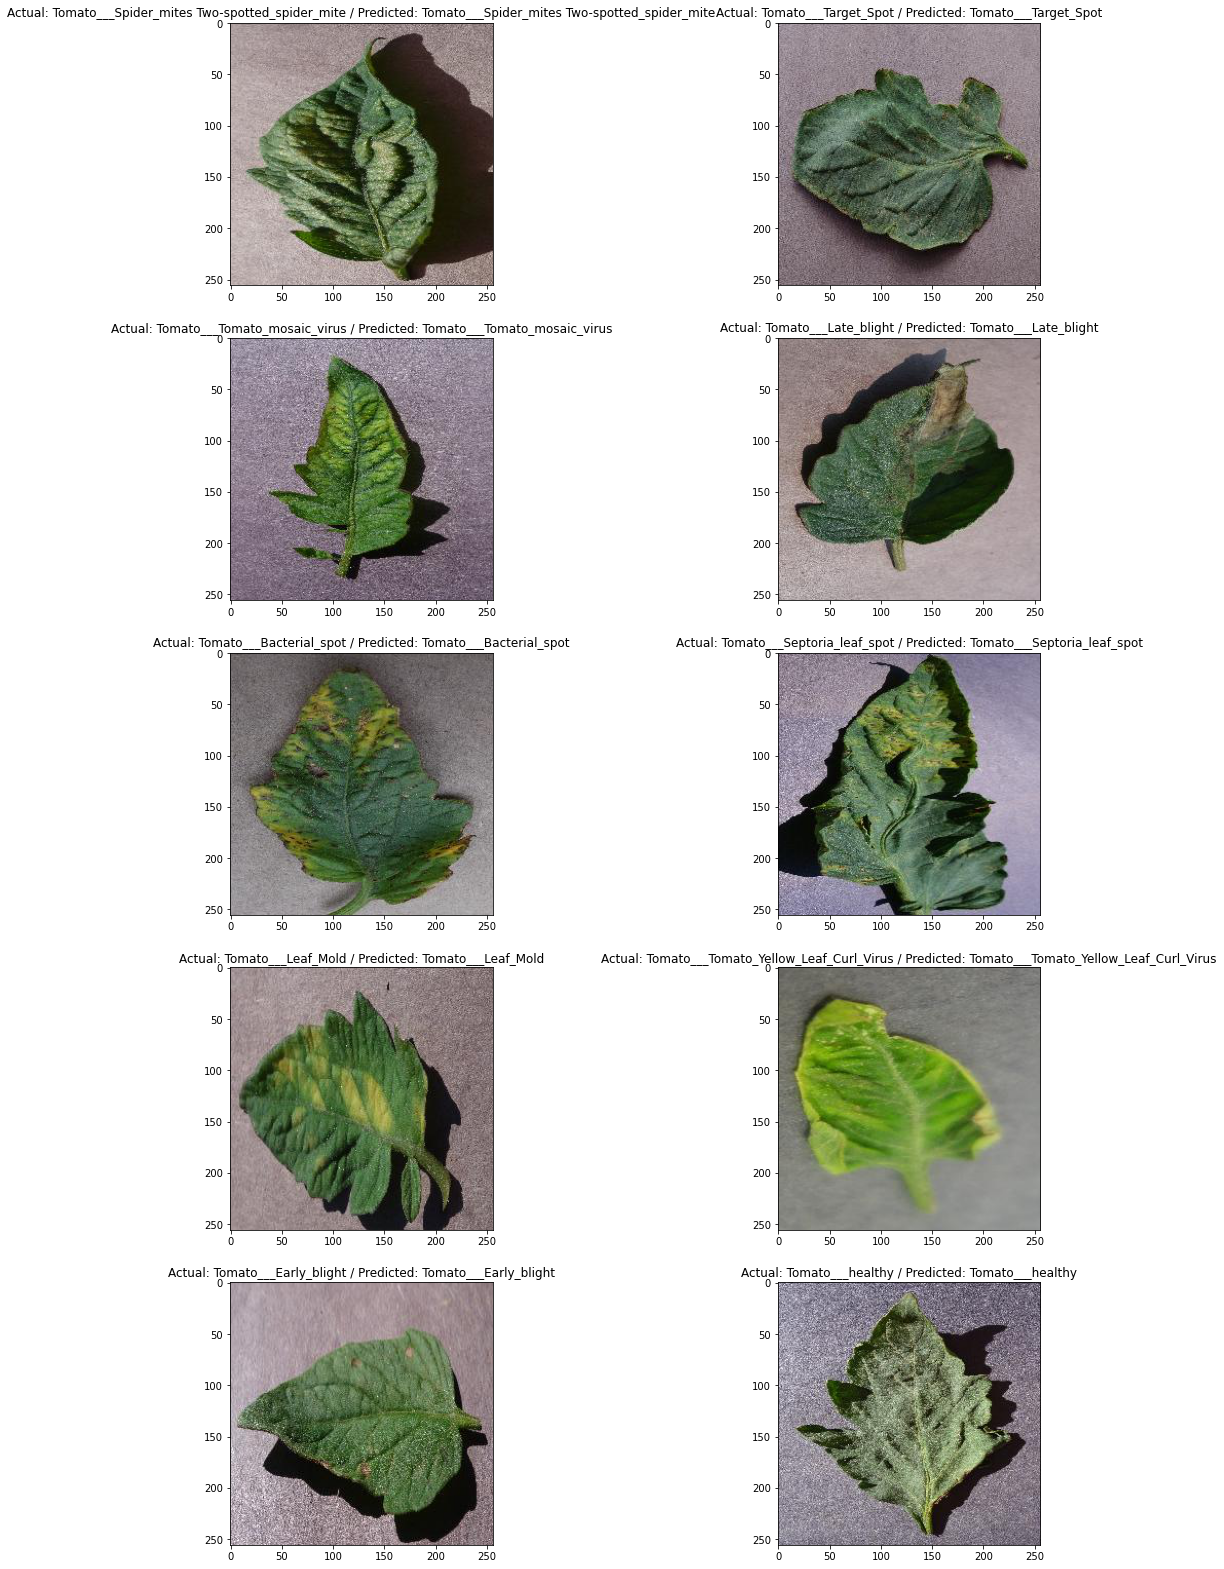

In [ ]:
# Prediction and visualizations

classes = os.listdir('./val')

plt.figure(figsize=(18,28))

for i in enumerate(classes):
    pic = os.listdir('./val/'+i[1])
    pic = pic[np.random.randint(len(pic)-1)]
    image = Image.open('./val/'+i[1]+'/'+pic)
    image = np.asarray(image)
    
    pred = np.argmax(model.predict(image.reshape(-1,256,256,3)))
    for j in list(enumerate(train.class_names)):
        if pred == j[0]:
            prediction =  j[1]
    
    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(image)
plt.show()